In [41]:
import pandas as pd
import numpy as np
import re
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [2]:
data_train = pd.read_csv('E:\\PycharmProjects\\Machine_L\\UDSClub\\udscourse-master\\udscourse-master\\data\\wikipedia_train.csv')
data_test = pd.read_csv('E:\\PycharmProjects\\Machine_L\\UDSClub\\udscourse-master\\udscourse-master\\data\\wikipedia_test.csv')

In [23]:
def get_language(page):
    res = re.search('[a-z][a-z].wikipedia.org',page)
    if res:
        return res.group(0)[0:2]
    return 'na'

In [3]:
data_train[:5]

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,...,2016-08-22,2016-08-23,2016-08-24,2016-08-25,2016-08-26,2016-08-27,2016-08-28,2016-08-29,2016-08-30,2016-08-31
0,15._November_de.wikipedia.org_desktop_all-agents,32.0,26.0,22.0,22.0,29.0,49.0,20.0,27.0,19.0,...,29.0,23.0,31.0,25.0,27.0,23.0,17.0,26.0,23.0,37.0
1,2012_(film)_fr.wikipedia.org_all-access_spider,2.0,3.0,5.0,3.0,5.0,3.0,7.0,8.0,7.0,...,5.0,5.0,6.0,5.0,4.0,11.0,2.0,0.0,7.0,5.0
2,2016_FIFA_U-20女子ワールドカップ_ja.wikipedia.org_all-a...,1.0,3.0,2.0,2.0,1.0,10.0,2.0,1.0,4.0,...,4.0,3.0,2.0,3.0,2.0,4.0,2.0,0.0,5.0,4.0
3,2016_UEFA_Europa_League_Final_en.wikipedia.org...,3.0,3.0,3.0,8.0,12.0,12.0,8.0,12.0,23.0,...,10.0,14.0,26.0,5.0,29.0,23.0,17.0,16.0,12.0,14.0
4,2016_in_video_gaming_en.wikipedia.org_all-acce...,24.0,40.0,23.0,49.0,88.0,25.0,31.0,76.0,51.0,...,134.0,162.0,208.0,179.0,108.0,99.0,49.0,80.0,113.0,173.0


In [32]:
Languages = []
for i in range(len(data_train.index)):
    Languages.append(get_language(data_train["Page"][i]))

In [35]:
n_rus = Languages.count('ru')
n_rus

102

In [6]:
data_train.columns[1:]

Index(['2015-07-01', '2015-07-02', '2015-07-03', '2015-07-04', '2015-07-05',
       '2015-07-06', '2015-07-07', '2015-07-08', '2015-07-09', '2015-07-10',
       ...
       '2016-08-22', '2016-08-23', '2016-08-24', '2016-08-25', '2016-08-26',
       '2016-08-27', '2016-08-28', '2016-08-29', '2016-08-30', '2016-08-31'],
      dtype='object', length=428)

In [14]:
new_data_train = pd.melt(data_train, id_vars = ["Page"], value_vars = data_train.columns[1:], var_name = 'date', value_name = 'Visits')
new_data_train[:10]

,Page,date,Visits
0,15._November_de.wikipedia.org_desktop_all-agents,2015-07-01,32.0
1,2012_(film)_fr.wikipedia.org_all-access_spider,2015-07-01,2.0
2,2016_FIFA_U-20女子ワールドカップ_ja.wikipedia.org_all-a...,2015-07-01,1.0
3,2016_UEFA_Europa_League_Final_en.wikipedia.org...,2015-07-01,3.0
4,2016_in_video_gaming_en.wikipedia.org_all-acce...,2015-07-01,24.0
5,2018_FIFA_World_Cup_qualification_(CONMEBOL)_e...,2015-07-01,48.0
6,22_апреля_ru.wikipedia.org_all-access_spider,2015-07-01,18.0
7,30._März_de.wikipedia.org_desktop_all-agents,2015-07-01,29.0
8,6-я_армия_(Третий_рейх)_ru.wikipedia.org_deskt...,2015-07-01,16.0
9,AKB48_41stシングル選抜総選挙_ja.wikipedia.org_all-acces...,2015-07-01,1086.0


In [43]:
last_day_train = new_data_train[new_data_train['date'] == '2016-08-31']
last_day_train.index = [i for i in range(len(last_day_train.index))]
last_day_train[:5]

,Page,date,Visits
0,15._November_de.wikipedia.org_desktop_all-agents,2016-08-31,37.0
1,2012_(film)_fr.wikipedia.org_all-access_spider,2016-08-31,5.0
2,2016_FIFA_U-20女子ワールドカップ_ja.wikipedia.org_all-a...,2016-08-31,4.0
3,2016_UEFA_Europa_League_Final_en.wikipedia.org...,2016-08-31,14.0
4,2016_in_video_gaming_en.wikipedia.org_all-acce...,2016-08-31,173.0


In [98]:
#индексы элементов с пропущенными значениями
indexes = [i for i in range(len(last_day_train.index)) if last_day_train["Visits"].isnull()[i]]
indexes

[195, 200, 204, 207, 218, 219, 228, 231, 235, 419, 618, 775, 869, 870]

In [99]:
last_day_train[last_day_train.index == 195]

,Page,date,Visits
195,File:Angel_and_the_Badman_1947_John_Wayne.ogv_...,2016-08-31,NaN


In [107]:
len(last_day_train.Page)

939

In [199]:
#means = []
#вытягиваем 5 последних дней месяца без последнего
#тоже есть наны поэтому забьем значениями из последнего дня
df = new_data_train[new_data_train['date'] == '2016-08-30']
df_1 = new_data_train[new_data_train['date'] == '2016-08-29']
df_2 = new_data_train[new_data_train['date'] == '2016-08-20']
df.index = np.arange(len(df.index))
df_1.index = np.arange(len(df_1.index))
df_2.index = np.arange(len(df_2.index))
means_1 = [df[df.index == i].mean() for i in range(195, 4695, 939)]
means_1[0] = 1.0
means_2 = [df[df.index == i] for i in range(200, 4695, 939)]
df.index

Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
            929, 930, 931, 932, 933, 934, 935, 936, 937, 938],
           dtype='int64', length=939)

In [147]:
for i in indexes:
    last_day_train.loc[i, "Visits"] = df.loc[i, "Visits"]

c:\python36\lib\site-packages\pandas\core\indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [187]:
new_ind = [207, 228, 419, 775, 869, 870]
in_ = [419, 775, 869, 870]
ind_ = [775, 869, 870]
for i in new_ind:
    last_day_train.loc[i, "Visits"] = df_1.loc[i, "Visits"]

c:\python36\lib\site-packages\pandas\core\indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [189]:
for i in ind_:
    last_day_train.loc[i, "Visits"] = df_2.loc[i, "Visits"]

c:\python36\lib\site-packages\pandas\core\indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [204]:
d = [new_data_train[new_data_train.index == i].Visits for i in range(870, len(new_data_train), 939)]


AttributeError: 'list' object has no attribute 'plot'

In [190]:
for i in indexes:
    print(last_day_train[last_day_train.index == i]["Visits"])

195    1.0
Name: Visits, dtype: float64
200    0.0
Name: Visits, dtype: float64
204    1.0
Name: Visits, dtype: float64
207    1.0
Name: Visits, dtype: float64
218    0.0
Name: Visits, dtype: float64
219    0.0
Name: Visits, dtype: float64
228    2.0
Name: Visits, dtype: float64
231    0.0
Name: Visits, dtype: float64
235    0.0
Name: Visits, dtype: float64
419   NaN
Name: Visits, dtype: float64
618    1.0
Name: Visits, dtype: float64
775    3.0
Name: Visits, dtype: float64
869   NaN
Name: Visits, dtype: float64
870   NaN
Name: Visits, dtype: float64


In [206]:
last_day_train[last_day_train.index == 419] = 1.0


c:\python36\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
c:\python36\lib\site-packages\pandas\core\indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [207]:
last_day_train

59325.0

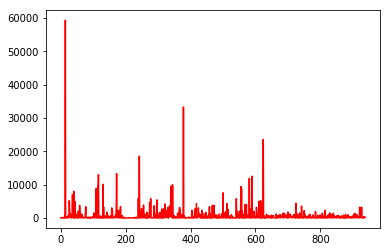

In [205]:
plt.plot(last_day_train.Visits, 'r')
plt.show()

In [19]:
new_data_test = pd.melt(data_test, id_vars = ["Page"], value_vars = data_test.columns[1:], var_name = 'date', value_name = 'Visits')
new_data_test[:10]

,Page,date,Visits
0,15._November_de.wikipedia.org_desktop_all-agents,2016-09-10,43.0
1,2012_(film)_fr.wikipedia.org_all-access_spider,2016-09-10,6.0
2,2016_FIFA_U-20女子ワールドカップ_ja.wikipedia.org_all-a...,2016-09-10,4.0
3,2016_UEFA_Europa_League_Final_en.wikipedia.org...,2016-09-10,15.0
4,2016_in_video_gaming_en.wikipedia.org_all-acce...,2016-09-10,101.0
5,2018_FIFA_World_Cup_qualification_(CONMEBOL)_e...,2016-09-10,25.0
6,22_апреля_ru.wikipedia.org_all-access_spider,2016-09-10,10.0
7,30._März_de.wikipedia.org_desktop_all-agents,2016-09-10,38.0
8,6-я_армия_(Третий_рейх)_ru.wikipedia.org_deskt...,2016-09-10,46.0
9,AKB48_41stシングル選抜総選挙_ja.wikipedia.org_all-acces...,2016-09-10,114.0
